# NEW VERSION WITH CORE NODES

Enrico Borriello, enrico.borriello@asu.edu
Latest Update: Jul 17 20224

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# color palettes from coolors.co

colors = {'random':'#74D3AE',
           'random dark':'#2C8C67',
           'cellcollective':'#DD9787',
           'cellcollective dark':'#AF4831'
          }

In [2]:
def gaussian(mu, sigma, x):
    y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    return y

# Import and Clean Data

In [3]:
#cc_data = pd.read_csv('240123_cell_collective_ck_and_isolated_fp_data.csv')
#rand_data = pd.read_csv('240123_random_ck_and_isolated_fp_data.csv')

cc_data = pd.read_csv('new_data/240216_cell_collective_ck_and_isolated_fp_data.csv')
iowa_data = pd.read_csv('new_data/240216_iowa_database_ck_and_isolated_fp_data.csv')
bio_data = pd.concat([cc_data, iowa_data], ignore_index=True)

#rand_data = pd.read_csv('new_data/240216_random_ck_and_isolated_fp_data.csv') # old data
rand_data = pd.read_csv('new_data/240626_random_ck_and_isolated_fp_data.csv')

In [4]:
rand_data[:3]

,name,mean control kernel size,number of attractors,size,number of core nodes,number of isolated fixed points,fraction of uncontrollable states
0,random_6_N10_k2_p0.25_seed738,NaN,4,10,10.0,0.0,1.0
1,random_30_N10_k2_p0.75_seed3690,0.0,1,10,10.0,0.0,0.0
2,random_4_N15_k2_p0.25_seed492,1.0,2,15,14.0,0.0,0.0


In [5]:
bio_data[:3]

,name,mean control kernel size,number of attractors,size,number of core nodes,number of isolated fixed points
0,Cortical Area Development,1.0,2,5,5.0,0.0
1,Cell Cycle Transcription By Coupled CDK And Ne...,1.0,2,9,9.0,0.0
2,Mammalian Cell Cycle 2006,0.0,1,10,10.0,0.0


In [6]:
print(len(bio_data))
print(len(rand_data))

104
371


In [7]:
#Select only controllable
rand_data = rand_data[rand_data['fraction of uncontrollable states']<0.99]

In [8]:
print(len(bio_data))
print(len(rand_data))

104
346


In [9]:
#  Clean further
# (Ask Bryan why fraction of uncontrollable is only in rand)
bio_data = bio_data.dropna(subset=['mean control kernel size'])
rand_data = rand_data.dropna(subset=['mean control kernel size'])

In [10]:
print(len(bio_data))
print(len(rand_data))

97
346


In [11]:
# these are the numbers we list in Table 1 of the manuscript

# Figure 4A

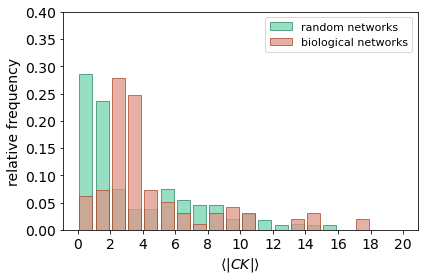

In [12]:
bio = bio_data['mean control kernel size']
rand = rand_data['mean control kernel size']

bins = np.linspace(0, 20, 21)
plt.ylim(0,.4)

plt.hist(rand, bins=bins,density=True,alpha=.75,
         label='random networks',
         #\n (variance = '+'{:.2f}'.format(np.var(rand))+')',
         color=colors['random'], edgecolor=colors['random dark'], rwidth=0.8)

plt.hist(bio,bins=bins,density=True,alpha=.75,
         label='biological networks',
         #\n (variance = '+'{:.2f}'.format(np.var(bio))+')',
         color=colors['cellcollective'], edgecolor=colors['cellcollective dark'], rwidth=0.8)

plt.xlabel(r'$ \langle|CK|\rangle $',size=14)
plt.ylabel('relative frequency',size=14)
plt.xticks([2*i for i in range(11) ],size=14)
plt.yticks(size=14)

plt.legend(fontsize=11)
plt.tight_layout()
plt.savefig('NEW_ck_dist.pdf')
plt.show()

# Figure 4B: Simple scaling

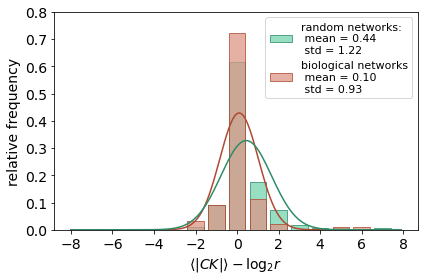

In [13]:
ck = bio_data['mean control kernel size']
r = bio_data['number of attractors']
bio = ck - np.log2(r)

ck = rand_data['mean control kernel size']
r = rand_data['number of attractors']
rand = ck - np.log2(r)

# Gaussian bio
mu_bio = np.mean(bio)
std_bio = np.std(bio)
x = np.arange(-8,8,.1)
y_bio = gaussian(mu_bio,std_bio,x)
plt.plot(x,y_bio,color=colors['cellcollective dark'])

# Gaussian rand
mu_rand = np.mean(rand)
std_rand = np.std(rand)
x = np.arange(-8,8,.1)
y_rand = gaussian(mu_rand,std_rand,x)
plt.plot(x,y_rand,color=colors['random dark'])

bins = np.linspace(-7.5, 7.5, 16)
plt.ylim(0,.8)

plt.hist(rand, bins=bins,density=True,alpha=.75,
         label='random networks:'+'\n mean = '+'{:.2f}'.format(mu_rand)+'\n std = '+'{:.2f}'.format(std_rand),
         color=colors['random'], edgecolor=colors['random dark'], rwidth=0.8)

plt.hist(bio,bins=bins,density=True,alpha=.75,
         label='biological networks'+'\n mean = '+'{:.2f}'.format(mu_bio)+'\n std = '+'{:.2f}'.format(std_bio),
         color=colors['cellcollective'], edgecolor=colors['cellcollective dark'], rwidth=0.8)

plt.xlabel(r'$ \langle|CK|\rangle - \log_2 r$',size =14)
plt.ylabel('relative frequency',size=14)
plt.xticks(size=14)
plt.yticks(size=14)

plt.legend(fontsize=11)
plt.tight_layout()
plt.savefig('NEW_ck_model1_dist.pdf')
plt.show()

In [14]:
# Save data
bio_simple_scaling = bio
rand_simple_scaling = rand

In [15]:
print('mu_bio = '+str(np.mean(bio)))
print('std_bio = '+str(np.std(bio)))
print('')
print('mu_rand = '+str(np.mean(rand)))
print('std_rand = '+str(np.std(rand)))

mu_bio = 0.09854458101474405
std_bio = 0.9294673940595941

mu_rand = 0.4406663393113336
std_rand = 1.2178559428652929


In [16]:
import math
bio_cleaned = [x for x in bio if not math.isnan(x)]
rand_cleaned = [x for x in rand if not math.isnan(x)]

In [17]:
import numpy as np
from scipy.stats import anderson
rng = np.random.default_rng()

In [18]:
res = anderson(bio_cleaned)

In [19]:
print(res.statistic)
print(res.critical_values)
print(res.significance_level)

10.275502081407964
[0.555 0.632 0.758 0.884 1.051]
[15.  10.   5.   2.5  1. ]


# Figure 4C: Corrected Scaling

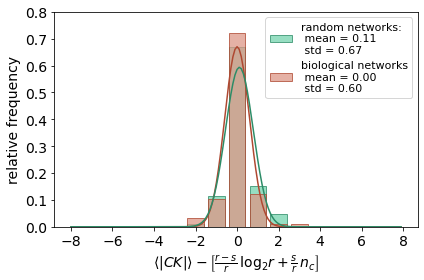

In [20]:
ck = bio_data['mean control kernel size']
r = bio_data['number of attractors']
s = bio_data['number of isolated fixed points'] 
#n = bio_data['size'] 
n = bio_data['number of core nodes']
bio = ck - ((r-s)/r)*np.log2(r) - (s/r)*n

ck = rand_data['mean control kernel size']
r = rand_data['number of attractors']
s = rand_data['number of isolated fixed points'] 
n = rand_data['size'] 
rand = ck - ((r-s)/r)*np.log2(r) - (s/r)*n

# Gaussian bio
mu_bio = np.mean(bio)
std_bio = np.std(bio)
x = np.arange(-8,8,.1)
y_bio = gaussian(mu_bio,std_bio,x)
plt.plot(x,y_bio,color=colors['cellcollective dark'])

# Gaussian rand
mu_rand = np.mean(rand)
std_rand = np.std(rand)
x = np.arange(-8,8,.1)
y_rand = gaussian(mu_rand,std_rand,x)
plt.plot(x,y_rand,color=colors['random dark'])

bins = np.linspace(-7.5, 7.5, 16)
plt.ylim(0,.8)

plt.hist(rand, bins=bins,density=True,alpha=.75,
         label='random networks:'+'\n mean = '+'{:.2f}'.format(mu_rand)+'\n std = '+'{:.2f}'.format(std_rand),
         color=colors['random'], edgecolor=colors['random dark'], rwidth=0.8)

plt.hist(bio,bins=bins,density=True,alpha=.75,
         label='biological networks'+'\n mean = '+'{:.2f}'.format(mu_bio)+'\n std = '+'{:.2f}'.format(std_bio),
         color=colors['cellcollective'], edgecolor=colors['cellcollective dark'], rwidth=0.8)

plt.xlabel(r'$ \langle|CK|\rangle - \left[\frac{r-s}{r}\,\log_2 r + \frac{s}{r}\,  n_c \right] $',size=14)
plt.ylabel('relative frequency',size=14)
plt.xticks(size=14)
plt.yticks(size=14)

plt.legend(fontsize=11)
plt.tight_layout()
plt.savefig('NEW_ck_model2_dist.pdf')
plt.show()

In [21]:
# Save data
bio_corrected_scaling = bio
rand_corrected_scaling = rand

# Statistical Tests

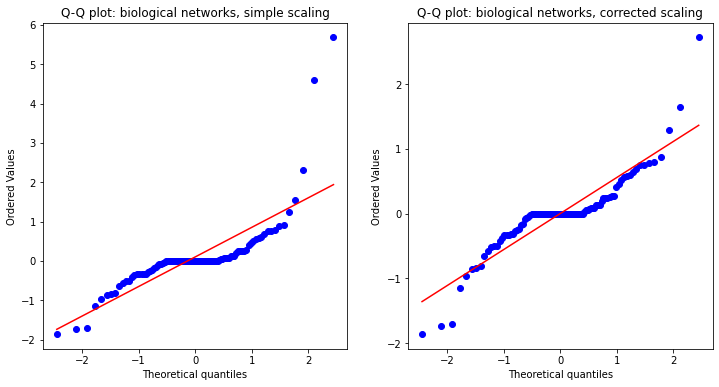

In [32]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Example data sets
data1 = bio_simple_scaling
data2 = bio_corrected_scaling

# Shapiro-Wilk Test
shapiro_data1 = stats.shapiro(data1)
shapiro_data2 = stats.shapiro(data2)

# Q-Q Plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
stats.probplot(data1, dist="norm", plot=plt)
plt.title('Q-Q plot: biological networks, simple scaling')

plt.subplot(1, 2, 2)
stats.probplot(data2, dist="norm", plot=plt)
plt.title('Q-Q plot: biological networks, corrected scaling')

plt.savefig('Q-Q_bio.pdf')
plt.show()


In [23]:
print("Shapiro-Wilk Test:")
print(f"Data1: {shapiro_data1}")
print(f"Data2: {shapiro_data2}")

Shapiro-Wilk Test:
Data1: ShapiroResult(statistic=0.6442127227783203, pvalue=5.44304117294607e-14)
Data2: ShapiroResult(statistic=0.8513252139091492, pvalue=1.929099724407024e-08)


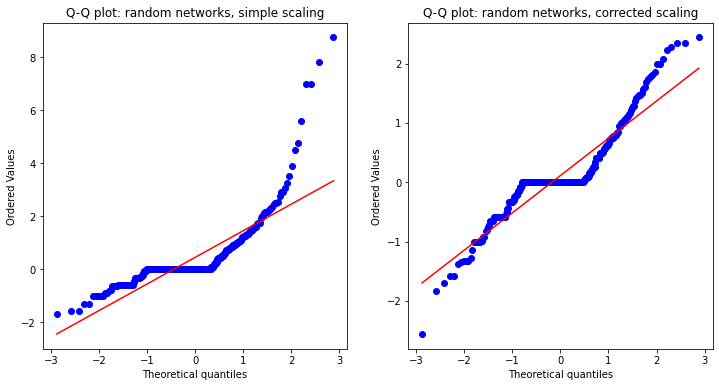

In [34]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Example data sets
data1 = rand_simple_scaling
data2 = rand_corrected_scaling

# Shapiro-Wilk Test
shapiro_data1 = stats.shapiro(data1)
shapiro_data2 = stats.shapiro(data2)

#print("Shapiro-Wilk Test:")
#print(f"Data1: {shapiro_data1}")
#print(f"Data2: {shapiro_data2}")

# Q-Q Plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
stats.probplot(data1, dist="norm", plot=plt)
plt.title('Q-Q plot: random networks, simple scaling')

plt.subplot(1, 2, 2)
stats.probplot(data2, dist="norm", plot=plt)
plt.title('Q-Q plot: random networks, corrected scaling')

plt.savefig('Q-Q_rand.pdf')
plt.show()


In [25]:
print("Shapiro-Wilk Test:")
print(f"simple scaling: {shapiro_data1}")
print(f"corrected scaling: {shapiro_data2}")

Shapiro-Wilk Test:
simple scaling: ShapiroResult(statistic=0.6771348714828491, pvalue=3.558791899509044e-25)
corrected scaling: ShapiroResult(statistic=0.8653945922851562, pvalue=9.255396665749731e-17)
